In [1]:
#install.packages("e1071")

In [76]:
library("e1071")
library("ggplot2")
library("dplyr")

In [42]:
df=read.csv('C:\\Users\\abine\\OneDrive\\Documents\\Datasets\\advertising.csv')

This dataset contains details of persons.Our objective is to predict,who is more likely to click the ad.

In [43]:
head(df)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<fct>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [44]:
str(df)

'data.frame':	1000 obs. of  10 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Ad.Topic.Line           : Factor w/ 1000 levels "Adaptive 24hour Graphic Interface",..: 92 465 567 904 767 806 223 724 108 455 ...
 $ City                    : Factor w/ 969 levels "Adamsbury","Adamside",..: 962 904 112 940 806 283 47 672 885 713 ...
 $ Male                    : int  0 1 0 1 0 1 0 1 1 1 ...
 $ Country                 : Factor w/ 237 levels "Afghanistan",..: 216 148 185 104 97 159 146 13 83 79 ...
 $ Timestamp               : Factor w/ 1000 levels "2016-01-01 02:52:10",..: 440 475 368 57 768 690 131 334 549 942 ...
 $ Clicked.on.Ad           : int  0 0 0 0 0 0 0 1 0 0 ...


Removing Identity Variables

In [45]:
df=select(df,-Ad.Topic.Line,-City,-Timestamp,-Country)

Changing some variables to factors

In [46]:
df$Male=factor(df$Male)
df$Clicked.on.Ad=factor(df$Clicked.on.Ad)

In [47]:
str(df)

'data.frame':	1000 obs. of  6 variables:
 $ Daily.Time.Spent.on.Site: num  69 80.2 69.5 74.2 68.4 ...
 $ Age                     : int  35 31 26 29 35 23 33 48 30 20 ...
 $ Area.Income             : num  61834 68442 59786 54806 73890 ...
 $ Daily.Internet.Usage    : num  256 194 236 246 226 ...
 $ Male                    : Factor w/ 2 levels "0","1": 1 2 1 2 1 2 1 2 2 2 ...
 $ Clicked.on.Ad           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 1 1 ...


In [48]:
summary(df)

 Daily.Time.Spent.on.Site      Age         Area.Income    Daily.Internet.Usage
 Min.   :32.60            Min.   :19.00   Min.   :13996   Min.   :104.8       
 1st Qu.:51.36            1st Qu.:29.00   1st Qu.:47032   1st Qu.:138.8       
 Median :68.22            Median :35.00   Median :57012   Median :183.1       
 Mean   :65.00            Mean   :36.01   Mean   :55000   Mean   :180.0       
 3rd Qu.:78.55            3rd Qu.:42.00   3rd Qu.:65471   3rd Qu.:218.8       
 Max.   :91.43            Max.   :61.00   Max.   :79485   Max.   :270.0       
 Male    Clicked.on.Ad
 0:519   0:500        
 1:481   1:500        
                      
                      
                      
                      

In [49]:
any(is.na(df))

[1] FALSE

In [50]:
pl<-ggplot(df, aes(x=Daily.Time.Spent.on.Site))+geom_histogram(aes(fill=Daily.Time.Spent.on.Site),color='black',bins=40,alpha=0.5)+theme_bw()

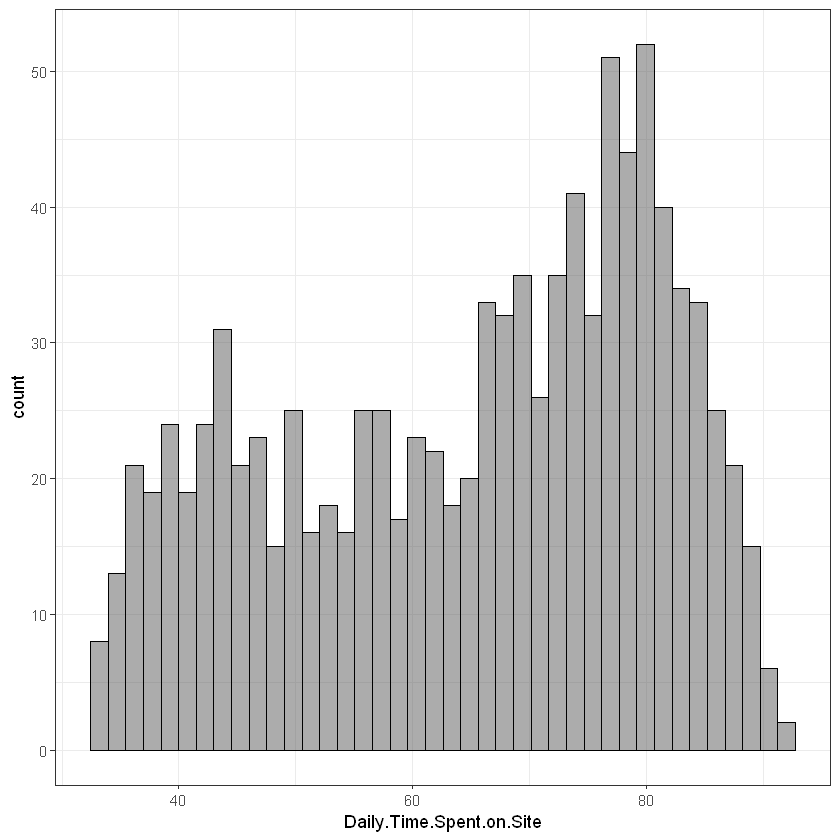

In [51]:
pl

Lot of people spend 70-90 minutes on the site

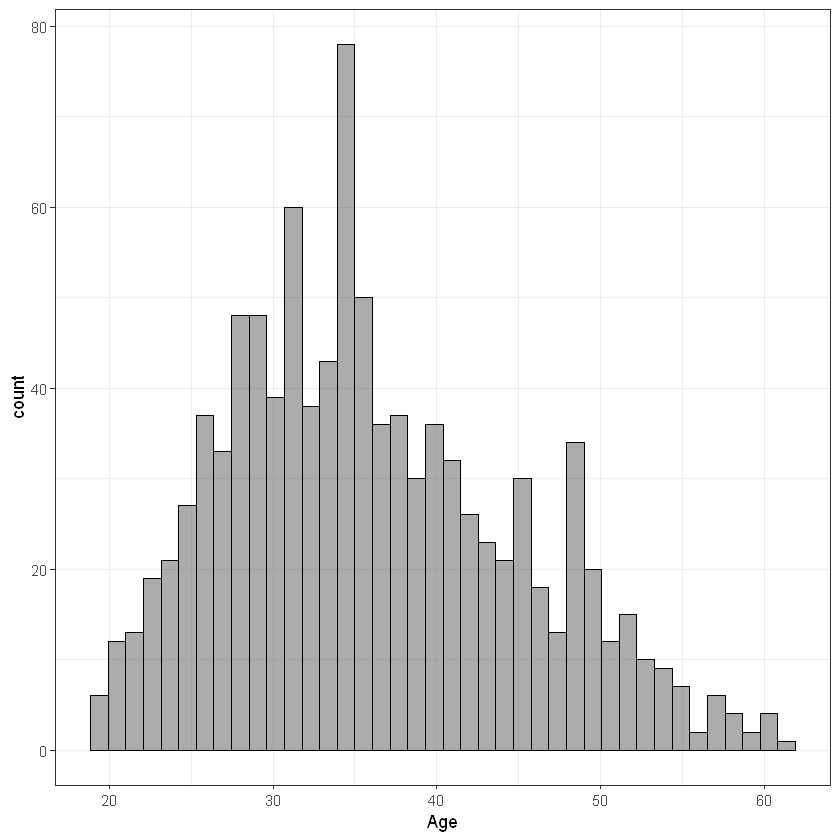

In [52]:
pl<-ggplot(df, aes(x=Age))+geom_histogram(aes(fill=Age),color='black',bins=40,alpha=0.5)+theme_bw()
pl

Lot of the users are between 25 to 35

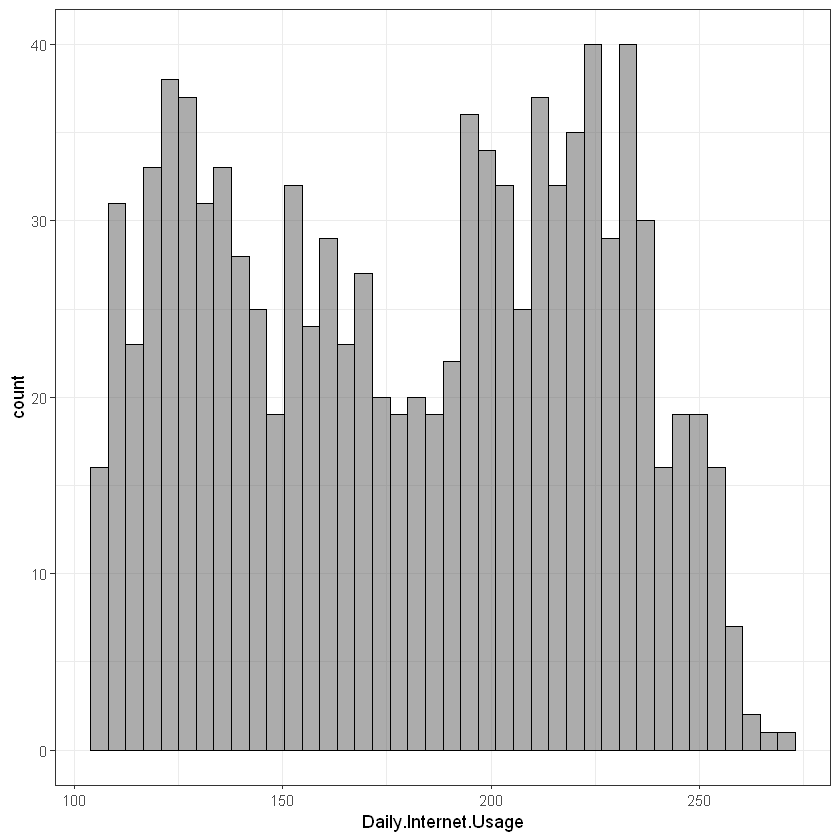

In [53]:
pl<-ggplot(df, aes(x=Daily.Internet.Usage))+geom_histogram(aes(fill=Daily.Internet.Usage),color='black',bins=40,alpha=0.5)+theme_bw()
pl

The daily internet usage is pretty uniform

## BUILDING MODEL

In [54]:
library(caTools)
set.seed(101)
spl=sample.split(df$Clicked.on.Ad,0.7)
train=subset(df,spl=TRUE)
test=subset(df,spl=FALSE)

Checking the mdoel without tuning

In [55]:
model=svm(Clicked.on.Ad~.,data=train)

In [56]:
summary(model)


Call:
svm(formula = Clicked.on.Ad ~ ., data = train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  121

 ( 60 61 )


Number of Classes:  2 

Levels: 
 0 1




In [57]:
predicted.values=predict(model,test[1:5])
table(predicted.values,test$Clicked.on.Ad)

                
predicted.values   0   1
               0 493  19
               1   7 481

There are some false classifications

This is due to gamma and cost parametrs are incorrect.We have to tune the model for the correct parameters

## TUNING THE MODEL

COST:The cost parameter decides how much an SVM should be allowed to “bend” with the data. For a low cost, you aim for a smooth decision surface and for a higher cost, you aim to classify more points correctly.

GAMMA:the gamma parameter defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'.

In [78]:
#OPTION 1
svm.tuned=tune(svm, train.x=Clicked.on.Ad~.,data=train,kernel='radial',ranges=list(cost=c(10,100),gamma=c(0.1,1)))

In [79]:
svm.tuned


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
  100   0.1

- best performance: 0.038 


In [74]:
#OPTION 2
tuned.results=tune(svm, train.x=Clicked.on.Ad~.,data=train,kernel='radial',ranges=list(cost=c(100,200),gamma=c(0.1)))

In [80]:
tuned.results


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.1

- best performance: 0.032 


In [75]:
#OPTION 3
tuned.results=tune(svm, train.x=Clicked.on.Ad~.,data=train,kernel='radial',ranges=list(cost=c(1,10),gamma=c(0.1,1)))

In [81]:
tuned.results


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.1

- best performance: 0.032 


## TESTING THE MODEL

Here, we are trying some gamma and cost values

Taking in random,
we are going to use gamma=1 and cost=10

In [97]:
model=svm(Clicked.on.Ad~.,data=train,gamma=1,cost=10)
predicted.values=predict(model,test[1:5])
table(predicted.values,test$Clicked.on.Ad)

                
predicted.values   0   1
               0 500   8
               1   0 492

There are only 8 Misclassifcations

In [98]:
TN=500
FP=8
FN=0
TP=492

In [99]:
ACC=(TP + TN)/(TN + FP + FN + TP)
ACC

[1] 0.992

This is a good accuraccy, bt lets check with the gamma & cost values found from tuning:

we are going to use gamma=100 and cost=0.1

We got this value from #OPTION 1 TUNING

In [82]:
model=svm(Clicked.on.Ad~.,data=train,gamma=100,cost=0.1)
predicted.values=predict(model,test[1:5])
table(predicted.values,test$Clicked.on.Ad)

                
predicted.values   0   1
               0 500   0
               1   0 500

This looks like  the best gamma and cost parameters for the model

In [83]:
TN=500
FP=0
FN=0
TP=500

In [84]:
ERR=(FP+FN)/(TN+FP+FN+TP)
ERR

[1] 0

ERR (Error Rate) is the percentage of wrong predictions of our model. Our model has an ERR of 0.008 stating that .8 % wrong predictions have been done by the model.

In [85]:
ACC=(TP + TN)/(TN + FP + FN + TP)
ACC

[1] 1

ACC (Accuracy) is the percentage of correct predictions of our model. Our model has an ACC of 1 stating that 100 % correct predictions have been made by the model.

In [86]:
SN = TP/(TP + FN)
SN

[1] 1

SN (Sensitivity) is the number of correct positive predictions divided by the total number of positives. Our model has an SN of 1 stating that 100 % correct positive predictions were made out of the total positives.

In [87]:
SP = TN/(TN + FP)
SP

[1] 1

SP (Specificity) is the number of correct negative predictions divided by the total number of negatives. Our model has an SP of 0.98 stating that 98 % correct negative predictions were made out of the total negatives.

In [88]:
PREC = TP/(TP + FP)
PREC

[1] 1

PREC (Precision) is the number of correct positive predictions divided by the total number of positive predictions. Our model has a PREC of 1 stating that 100 % of the predictions regarding the positive predicted values are correct.

In [89]:
FPR = FP/(TN + FP)
FPR

[1] 0

FPR (False Positive Rate) is the number of incorrect positive predictions divided by the total number of negatives. Our model has a FPR of 0 stating that 0 % of the predictions regarding the positive predicted values are incorrect.

Taking Gamma=0.1 and Cost=1 from #OPTION 1 and #OPTION 2 Tuning

In [92]:
model=svm(Clicked.on.Ad~.,data=train,gamma=0.1,cost=1)
predicted.values=predict(model,test[1:5])
table(predicted.values,test$Clicked.on.Ad)

                
predicted.values   0   1
               0 492  21
               1   8 479

In [93]:
TN=492
FP=21
FN=8
TP=479

There are lot of FP while using these parameters

In [94]:
ACC=(TP + TN)/(TN + FP + FN + TP)
ACC

[1] 0.971

Here the accuraccy is lesser than previous model